<img src="https://news.illinois.edu/files/6367/543635/116641.jpg" alt="University of Illinois" width="250"/>

##Drug Overdose Deaths
###Deep Learning

* Akshat Bhardwaj <akshatb4@illinois.edu>,
[LinkedIn](https://www.linkedin.com/in/akshat-bhardwaj/)
* Catherine Li <sl182@illinois.edu>,
[LinkedIn](https://www.linkedin.com/in/catherine-li-482797252/)
* Hélène Rondey <hrondey2@illinois.edu>,
[LinkedIn](https://www.linkedin.com/in/h%C3%A9l%C3%A8ne-r-98401a1b7?lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_view_base_contact_details%3BzsAqgF02Qd2grkWQ0eXwXg%3D%3D)
* Yang-Hsuan Huang <yhh4@illinois.edu>,
[LinkedIn](https://www.linkedin.com/in/yang-hsuan-huang-904148281?lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_view_base_contact_details%3BCxCLmEzYQqKYAfU3aoIUug%3D%3D)


# Importing packages

In [4]:
!pip install skorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.3/239.3 kB 4.0 MB/s eta 0:00:00


In [5]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

from sklearn.model_selection import GridSearchCV
from skorch import NeuralNet

from matplotlib import pyplot as plt
import pickle
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/MyDrive/Deep_Dive_Group_1
#%cd /content/drive/Shareddrives/Deep_Dive_Group_1

/content/drive/MyDrive/Deep_Dive_Group_1


In [8]:
SEED=1

# Importing the data

We use the same preprocessed data from the Base Learning notebook.

In [7]:
df_preprocessed = pd.read_csv("data_preprocessed.csv", thousands=',').astype("float32") #this type is  important because it matches the one of the layers in the Feed Forward Network.
df_preprocessed

,Year,Percent_pending_investigation,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,...,Month_October,Month_September,Indicator_Cocaine (T40.5),Indicator_Heroin (T40.1),Indicator_Methadone (T40.3),Indicator_Natural & semi-synthetic opioids (T40.2),"Indicator_Opioids (T40.0-T40.4,T40.6)",Indicator_Psychostimulants with abuse potential (T43.6),"Indicator_Synthetic opioids, excl. methadone (T40.4)",Predicted_value
0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000118
1,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000589
2,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.004477
3,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.008130
4,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.002828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25037,1.0,0.408693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.026275
25038,1.0,0.408693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.036880
25039,1.0,0.408693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.320490
25040,1.0,0.408693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.302580


In [9]:
label = ['Predicted_value']
feature = ['Year', 'Percent_pending_investigation',
      'State_AK', 'State_AL', 'State_AR', 'State_AZ', 'State_CA', 'State_CO',
      'State_CT', 'State_DC', 'State_DE', 'State_FL', 'State_GA', 'State_HI',
      'State_IA', 'State_ID', 'State_IL', 'State_IN', 'State_KS', 'State_KY',
      'State_MA', 'State_MD', 'State_ME', 'State_MI', 'State_MN',
      'State_MO', 'State_MS', 'State_MT', 'State_NC',
      'State_NH', 'State_NJ', 'State_NM', 'State_NV', 'State_NY', 'State_OH',
      'State_OK', 'State_OR', 'State_RI', 'State_SC', 'State_SD',
      'State_TN', 'State_TX', 'State_UT', 'State_VA', 'State_VT', 'State_WA',
      'State_WI', 'State_WV', 'State_WY', 'State_YC',
      'Month_April', 'Month_August', 'Month_December', 'Month_February',
      'Month_January', 'Month_July', 'Month_June', 'Month_March', 'Month_May',
      'Month_November', 'Month_October', 'Month_September',
      'Indicator_Cocaine (T40.5)',
      'Indicator_Heroin (T40.1)',
      'Indicator_Methadone (T40.3)',
      'Indicator_Natural & semi-synthetic opioids (T40.2)',
      'Indicator_Opioids (T40.0-T40.4,T40.6)',
      'Indicator_Psychostimulants with abuse potential (T43.6)',
      'Indicator_Synthetic opioids, excl. methadone (T40.4)']

In [10]:
#State LA, ND, NE, PA do not have data for causes of drug overdose death, so they are removed
data = df_preprocessed[feature+label]
X = df_preprocessed[feature].squeeze()
Y = df_preprocessed[label].squeeze()
data.head()

,Year,Percent_pending_investigation,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,...,Month_October,Month_September,Indicator_Cocaine (T40.5),Indicator_Heroin (T40.1),Indicator_Methadone (T40.3),Indicator_Natural & semi-synthetic opioids (T40.2),"Indicator_Opioids (T40.0-T40.4,T40.6)",Indicator_Psychostimulants with abuse potential (T43.6),"Indicator_Synthetic opioids, excl. methadone (T40.4)",Predicted_value
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000118
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000589
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.004477
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.008130
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.002828


In total, we are using 69 features (after encoding) and 25042 rows.

In [11]:
X = df_preprocessed[feature]
Y = df_preprocessed[label]

# Creating training and testing sets (validation will take place during the cross validation)
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=42, test_size=0.15)

# Converting the data in PyTorch tensors
X_train, y_train = X_train.values, y_train.values
X_test, y_test = X_test.values, y_test.values
y_train, y_test, = y_train.reshape(-1), y_test.reshape(-1)


# Neural Network and Hyperparameters

We try 3 layers that are 128 neurons large each, to make sure the information from all the features is captured with a simple architecture.
The hidden activation functions are the hyperbolic tangents while the final activation is ReLU, since the target variable is positive (and has been scaled using MinMax).

In [12]:
class FeedForwardNN(nn.Module):
    def __init__(self):
        super(FeedForwardNN, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(69, 128),
            nn.Tanh(),
            nn.Linear(128, 128),
            nn.Tanh(),
            nn.Linear(128, 128),
            nn.Tanh(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, 1)
        )

    def forward(self, x):
        return self.layers(x).squeeze(1)

We experiment with 3 different types of optimizers: Adam, RMSprop and Stochastic Gradient Descent, and for each we perform a grid-search for the hyperparameters. The common hyperparameters affect the learning schedule: we try varying the learning rate and different batch sizes to make the gradient computations simpler. For the algorithm-specific hyperparameters, our lists include some of the default values. The RMS prop has the most combinations to try, and we test it with and without momentum.

In [ ]:

#These hyperparameters are common to all the algorithms
BATCHSIZE = [64, 128, 256, 512]
EPOCHS = 10
learningRate = [0.01, 0.001, 0.0001]

#Algorithm-specific values
Epsilon = [1e-8, 1e-7, 1e-6]
Momentum = [0, 0.95]

# Hyperparameter grids
adam_grid = {
    'lr': learningRate,
    'optimizer__eps': Epsilon,
    'batch_size': BATCHSIZE
}

rms_grid = {
    'lr':learningRate,
    'optimizer__momentum': Momentum,
    'optimizer__eps': Epsilon,
    'batch_size': BATCHSIZE
}

sgd_grid = {
    'lr': learningRate,
    'optimizer__momentum': Momentum,
    'batch_size': BATCHSIZE
}

In [13]:
def create_net(optimizer_name, epochs=10):
    if optimizer_name == 'adam':
      net = NeuralNet(
              FeedForwardNN(),
             criterion=nn.MSELoss(),
          # Shuffle training data on each epoch
             iterator_train__shuffle=True,
              optimizer= torch.optim.Adam,
              verbose=True,
              max_epochs= epochs,
              train_split=None#,
              #callbacks=[EarlyStopping(patience=5)]
             )

    elif optimizer_name == 'rms':
      net = NeuralNet(
              FeedForwardNN(),
             criterion=nn.MSELoss(),
          # Shuffle training data on each epoch
             iterator_train__shuffle=True,
              optimizer= torch.optim.RMSprop,
              verbose=True,
              max_epochs= epochs,
              train_split=None#,
              #callbacks=[EarlyStopping(patience=5)]
             )
    elif optimizer_name == 'sgd':
      net = NeuralNet(
              FeedForwardNN(),
             criterion=nn.MSELoss(),
          # Shuffle training data on each epoch
             iterator_train__shuffle=True,
              optimizer= torch.optim.SGD,
              verbose=True,
              max_epochs= epochs,
              train_split=None#,
             # callbacks=[EarlyStopping(patience=5)]
             )
    return net

In [ ]:
def save_net_weights(net, optimizer_name):
    if optimizer_name == 'adam':
      net.save_params(f_params='adam_state_dict.pkl')
    elif optimizer_name == 'rms':
      net.save_params(f_params='rms_state_dict.pkl')
    elif optimizer_name == 'sgd':
      net.save_params(f_params='sgd_state_dict.pkl')

# Training and testing models

We perform 4-fold Cross-validation to find the best combination of hyperparameters with each optimizer. Since we're working on a Regression problem, our loss function is the MSE, and we rely on the MAE to compare the out-of-fold performance of each combination.

In [ ]:
optimizer_best_params = {'adam': [], 'rms': [], 'sgd': []}
optimizer_best_score = {'adam': 0, 'rms': 0, 'sgd': 0}
optimizer_cv_results = {'adam': {}, 'rms': {}, 'sgd': {}}


In [ ]:
for grid, optimizer_name in [(sgd_grid, 'sgd'), (adam_grid, 'adam'), (rms_grid, 'rms')]:

  net = create_net(optimizer_name=optimizer_name, epochs = EPOCHS)
  net.initialize()
  # deactivate skorch-internal train-valid split and verbose logging
  net.set_params(train_split=False, verbose=3)
  gs = GridSearchCV(net, param_grid= grid, refit=True, n_jobs=-1, cv=4, scoring= "neg_mean_absolute_error", error_score="raise")
  gs.fit(torch.from_numpy(X_train).to(torch.float32).squeeze(1),torch.from_numpy(y_train).to(torch.float32))
  print(gs.best_score_, gs.best_params_)

# give the optimizer its associated best score, best params and cross-validation results in the dictionnaries
  optimizer_best_params[optimizer_name] = gs.best_params_
  optimizer_best_score[optimizer_name]  = gs.best_score_
  optimizer_cv_results[optimizer_name] = gs.cv_results_

# Save the weights of the best model, the one that has been refitted on the data after the search.
  best_net = gs.best_estimator_
  save_net_weights(best_net, optimizer_name)

  epoch    train_loss     dur
-------  ------------  ------
      1        0.0040  0.6587
      2        0.0011  0.6887
      3        0.0008  0.7316
      4        0.0007  0.9812
      5        0.0004  1.0939
      6        0.0003  1.3972
      7        0.0004  1.0899
      8        0.0004  1.0826
      9        0.0002  1.0702
     10        0.0002  1.0407
-0.009299850789830089 {'batch_size': 256, 'lr': 0.0001, 'optimizer__eps': 1e-07, 'optimizer__momentum': 0.95}


In [ ]:

#Saving the results

#with open('optimizer_best_score.pkl', 'wb') as f:
 #   pickle.dump(optimizer_best_score, f)

#with open('optimizer_best_params.pkl', 'wb') as f:
 #   pickle.dump(optimizer_best_params, f)

#with open('optimizer_cv_results.pkl', 'wb') as f:
 #   pickle.dump(optimizer_cv_results, f)



In [14]:
with open('optimizer_best_score.pkl', 'rb') as f:
    optimizer_best_score = pickle.load(f)

with open('optimizer_best_params.pkl', 'rb') as f:
    optimizer_best_params = pickle.load(f)

with open('optimizer_cv_results.pkl', 'rb') as f:
    optimizer_cv_results = pickle.load(f)

#Selecting the best model

In [13]:
optimizer_best_score
#In the sklearn gridsearch, the MAE is negative because in that module, "a higher score has to be a better model" (which is not naturally true with the MAE by definition).


{'adam': -0.007780931773595512,
 'rms': -0.009299850789830089,
 'sgd': -0.020387020893394947}

Here, the best score is obtained by the Adam optimizer, with a MAE of 0.00778 on the preprocessed data; the worst is the Stochastic Gradient Descent optimizer.

In [57]:
adam_params = optimizer_best_params['adam']
adam_params

{'batch_size': 128, 'lr': 0.001, 'optimizer__eps': 1e-08}

In [ ]:
df_hyperparameters = pd.DataFrame(optimizer_cv_results["adam"]["params"])
df_hyperparameters["mean_test_score"] = -optimizer_cv_results["adam"]["mean_test_score"]
df_hyperparameters.sort_values("mean_test_score", ascending=True)

,batch_size,lr,optimizer__eps,mean_test_score
12,128,0.0010,1.000000e-08,0.007781
13,128,0.0010,1.000000e-07,0.007984
22,256,0.0010,1.000000e-07,0.008253
21,256,0.0010,1.000000e-08,0.008829
14,128,0.0010,1.000000e-06,0.008869
23,256,0.0010,1.000000e-06,0.008960
5,64,0.0010,1.000000e-06,0.009666
4,64,0.0010,1.000000e-07,0.009988
3,64,0.0010,1.000000e-08,0.010376
30,512,0.0010,1.000000e-08,0.010730


Looking at the list of hyperparameters and their corresponding metric on the testing fold, it looks like 0.001 was the best choice for the learning rate, while 0.01 is the poorest choice. For epsilon and the batchsize, it is harder to observe a trend.

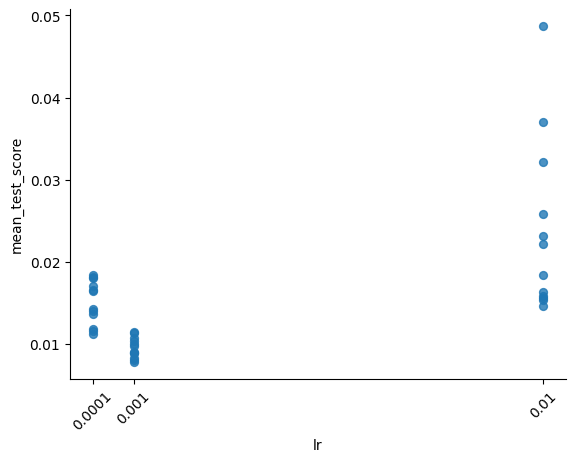

In [ ]:
df_hyperparameters.plot(kind='scatter', x='lr', y='mean_test_score', s=32, alpha=.8)
ax = plt.gca()
ax.spines[['top', 'right']].set_visible(False)
learning_rate = [0.0001, 0.001, 0.01]
plt.xticks(learning_rate, learning_rate,rotation=45)
plt.show()

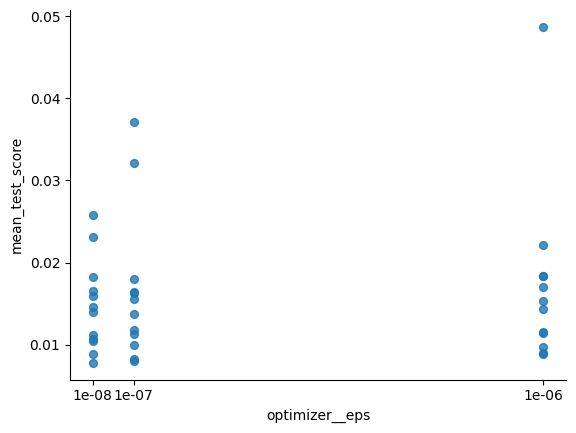

In [ ]:
df_hyperparameters.plot(kind='scatter', x='optimizer__eps', y='mean_test_score', s=32, alpha=.8)
ax = plt.gca()
ax.spines[['top', 'right']].set_visible(False)
optimizer__eps = [1e-8, 1e-7, 1e-6]
plt.xticks(optimizer__eps, optimizer__eps)
plt.show()


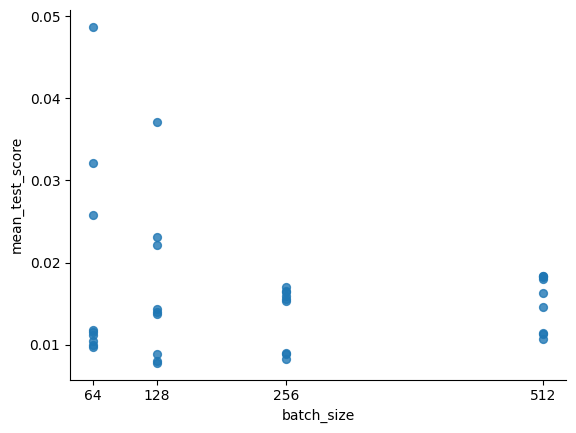

In [ ]:

df_hyperparameters.plot(kind='scatter', x='batch_size', y='mean_test_score', s=32, alpha=.8)
ax = plt.gca()
ax.spines[['top', 'right']].set_visible(False)

batch_sizes = [64, 128, 256, 512]
# Set the x-axis ticks and labels to your batch sizes
plt.xticks(batch_sizes, batch_sizes)
# Show the plot
plt.show()

# Performance of the best model

Let's load the NeuralNet that was trained during the GridSearch with the best parameters for the Adam optimizer.

In [15]:
loaded_net = create_net(optimizer_name="adam")
loaded_net.initialize()
loaded_net.load_params(f_params='adam_state_dict.pkl')


In [16]:
#The weights are stored in the state_dict of the module (the FeedForwardNN model wrapped in the NeuralNet object)
loaded_net.module_.state_dict()

OrderedDict([('layers.0.weight',
              tensor([[ 0.0265,  0.0695,  0.0209,  ...,  0.0851,  0.0763, -0.1171],
                      [ 0.1024, -0.0442, -0.0752,  ..., -0.0330, -0.0444,  0.0929],
                      [ 0.1411,  0.0990,  0.0200,  ..., -0.0967, -0.0462,  0.1123],
                      ...,
                      [-0.0116,  0.0216,  0.0289,  ..., -0.0300, -0.0723,  0.0373],
                      [ 0.0540,  0.0373, -0.1526,  ..., -0.0400, -0.0078, -0.0004],
                      [ 0.1640,  0.0756, -0.0376,  ..., -0.0982,  0.0054, -0.0311]])),
             ('layers.0.bias',
              tensor([ 0.0687,  0.0284, -0.0852,  0.0280, -0.0518, -0.0255,  0.0017,  0.1209,
                       0.0675, -0.0659,  0.0415, -0.0458,  0.0273,  0.0409,  0.0026,  0.0287,
                      -0.0094, -0.0222, -0.0364, -0.0232,  0.0589,  0.0630,  0.0953, -0.0148,
                       0.0387,  0.0436, -0.0844,  0.0029,  0.0023, -0.0746,  0.0035, -0.0585,
                      -0.0

## Performance on the training set

In [18]:
predictions = loaded_net.predict(X_train)
actuals = y_train

# Calculate MSE and MAE
mse = np.mean((predictions - actuals) ** 2)
mae = np.mean(np.abs(predictions - actuals))

print("mse - preprocessed data: ", mse)
print("mae - preprocessed data: ", mae)


scaler = pickle.load(open('minmax_scaler_label.pkl', 'rb'))
predictions_rescaled = scaler.inverse_transform(predictions.reshape(-1, 1))
actuals_rescaled = scaler.inverse_transform(actuals.reshape(-1, 1))

# Calculate MSE and MAE
mse = np.mean((predictions_rescaled - actuals_rescaled) ** 2)
mae = np.mean(np.abs(predictions_rescaled - actuals_rescaled))
mre = np.mean(np.abs(predictions_rescaled - actuals_rescaled)/actuals_rescaled)

print("mse - rescaled data: ", mse)
print("mae - rescaled data: ", mae)
print("mre - rescaled data: ", mre)

df_predictions_train = pd.DataFrame(data= predictions_rescaled.reshape(-1))
df_predictions_train["actuals"] = actuals_rescaled
df_predictions_train.columns = ["predictions", "actuals"]
df_predictions_train

mse - preprocessed data:  9.436847e-05
mae - preprocessed data:  0.006108743
mse - rescaled data:  6797.2827
mae - rescaled data:  51.844902
mre - rescaled data:  0.45314896


,predictions,actuals
0,76.767166,52.999996
1,214.756134,227.000000
2,561.249390,509.000000
3,575.317871,524.000000
4,155.981583,189.000000
...,...,...
21280,126.652443,112.000000
21281,145.773972,192.000000
21282,130.033051,145.999985
21283,102.675529,100.000008


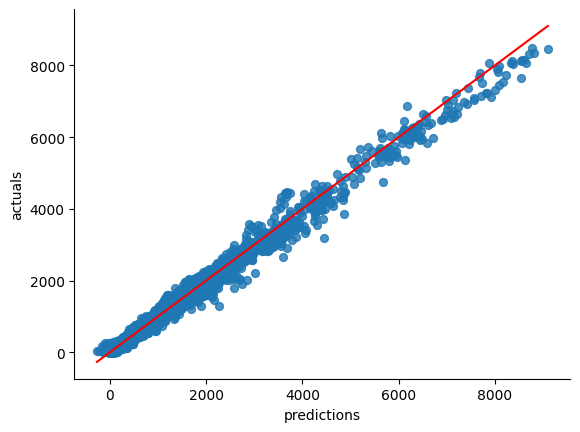

In [19]:
from matplotlib import pyplot as plt
df_predictions_train.plot(kind='scatter', x='predictions', y='actuals', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
min_val = min(df_predictions_train['predictions'].min(), df_predictions_train['actuals'].min())
max_val = max(df_predictions_train['predictions'].max(), df_predictions_train['actuals'].max())

plt.plot([min_val, max_val], [min_val, max_val], color='red')

In [32]:
df_predictions_train_small.describe()

,predictions,actuals
count,18191.000000,18196.000000
mean,255.769638,241.863434
std,225.733383,234.146988
min,-270.131256,10.000000
25%,88.249969,58.000000
50%,177.595444,157.000000
75%,361.452057,351.999969
max,999.926208,999.000000


In [34]:
df_predictions_train_small = df_predictions_train.loc[df_predictions_train.actuals<1000]
mre = np.mean(np.abs(df_predictions_train_small.predictions - df_predictions_train_small.actuals)/df_predictions_train_small.actuals)
mae = np.mean(np.abs(df_predictions_train_small.predictions - df_predictions_train_small.actuals))
print("Number of values smaller than 1000:", df_predictions_train_small.shape[0])
print("Relative error:", mre)
print("Mean Absolute Error:", mae)



Number of values smaller than 1000: 18196
Relative error: 0.51953083
Mean Absolute Error: 40.24367


In [35]:
df_predictions_train_big = df_predictions_train.loc[df_predictions_train.actuals>1000]
mre = np.mean(np.abs(df_predictions_train_big.predictions - df_predictions_train_big.actuals)/df_predictions_train_big.actuals)
mae = np.mean(np.abs(df_predictions_train_big.predictions - df_predictions_train_big.actuals))

print("Number of values higher than 1000:", df_predictions_train_big.shape[0])
print("Relative error:", mre)
print("Mean Absolute Error:", mae)

Number of values higher than 1000: 3088
Relative error: 0.062127355
Mean Absolute Error: 120.20755


The relative errors are higher for small Death count values and small for high values, showing the trend of the errors found in the Test set comes from the training and is not due to the model predicting on new values (see below). The errors found in the Test set are a slightly worse but close to these ones, which is normal.

## Performance on the testing set

In [37]:
predictions = loaded_net.predict(X_test)
actuals = y_test

# Calculate MSE and MAE
mse = np.mean((predictions - actuals) ** 2)
mae = np.mean(np.abs(predictions - actuals))

print("mse: ", mse)
print("mae: ", mae)

scaler = pickle.load(open('minmax_scaler_label.pkl', 'rb'))
predictions_rescaled = scaler.inverse_transform(predictions.reshape(-1, 1))
actuals_rescaled = scaler.inverse_transform(actuals.reshape(-1, 1))

# Calculate MSE, MAE and MRE
mse = np.mean((predictions_rescaled - actuals_rescaled) ** 2)
mae = np.mean(np.abs(predictions_rescaled - actuals_rescaled))
mre = np.mean(np.abs(predictions_rescaled - actuals_rescaled)/actuals_rescaled)

print("mse - rescaled data: ", mse)
print("mae - rescaled data: ", mae)
print("mre - rescaled data: ", mre)

df_predictions_test = pd.DataFrame(data= predictions_rescaled.reshape(-1))
df_predictions_test["actuals"] = actuals_rescaled
df_predictions_test.columns = ["predictions", "actuals"]
df_predictions_test

mse:  9.2145245e-05
mae:  0.006292604
mse - rescaled data:  6637.1445
mae - rescaled data:  53.40533
mre - rescaled data:  0.4832411


,predictions,actuals
0,469.278687,514.000000
1,1272.863037,1234.000122
2,100.282379,31.000000
3,241.899567,204.000000
4,1021.390808,770.999939
...,...,...
3752,677.349243,705.999939
3753,1980.026611,2180.000000
3754,947.793335,1016.000000
3755,225.700668,204.000000


The Mean Absolute error is 53.4 overdose deaths, which is a fairly good prediction overall considering the range of the number of deaths.

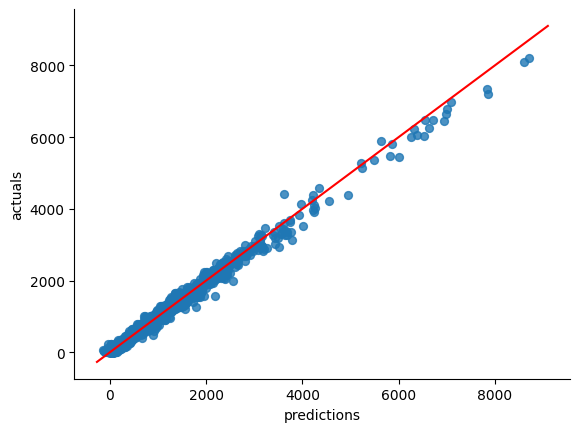

In [ ]:
df_predictions_test.plot(kind='scatter', x='predictions', y='actuals', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
min_val = min(df_predictions_train['predictions'].min(), df_predictions_train['actuals'].min())
max_val = max(df_predictions_train['predictions'].max(), df_predictions_train['actuals'].max())

plt.plot([min_val, max_val], [min_val, max_val], color='red')

The model seems to underestimate the number of deaths at higher values points (both in the training and testing sets) suggesting the model has room for improvement in accurately capturing the trends for higher values. Let's take a look at the smaller values:

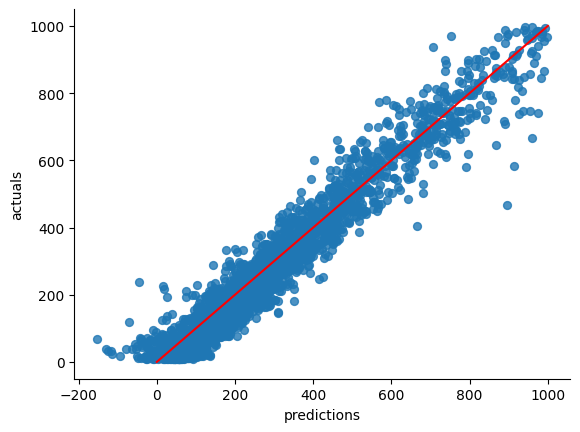

In [24]:
df_predictions_test[df_predictions_test < 1000].plot(kind='scatter', x='predictions', y='actuals', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
min_val = min(0,0)
max_val = max(1000,1000)

plt.plot([min_val, max_val], [min_val, max_val], color='red')

The Mean Relative Error is 48%, which, looking at the Predicted vs Actual graphs, is increased by the errors in smaller values. Let's verify this assumption:

In [38]:
df_predictions_test_small = df_predictions_test.loc[df_predictions_test.actuals<1000]
mre = np.mean(np.abs(df_predictions_test_small.predictions - df_predictions_test_small.actuals)/df_predictions_test_small.actuals)
mae = np.mean(np.abs(df_predictions_test_small.predictions - df_predictions_test_small.actuals))
print("Number of values smaller than 1000:", df_predictions_test_small.shape[0])
print("Relative error:", mre)
print("Mean Absolute Error:", mae)

Number of values smaller than 1000: 3229
Relative error: 0.55161685
Mean Absolute Error: 41.852417


In [39]:
df_predictions_test_big = df_predictions_test.loc[df_predictions_test.actuals>1000]
mre = np.mean(np.abs(df_predictions_test_big.predictions - df_predictions_test_big.actuals)/df_predictions_test_big.actuals)
mae = np.mean(np.abs(df_predictions_test_big.predictions - df_predictions_test_big.actuals))

print("Number of values higher than 1000:", df_predictions_test_big.shape[0])
print("Relative error:", mre)
print("Mean Absolute Error:", mae)

Number of values higher than 1000: 526
Relative error: 0.06497203
Mean Absolute Error: 124.166725


Indeed, the relative error is small for high values (6%) while it is quite high for small values (55%) , so the model also has room for improvement capturing the signal in smaller values of the number of deaths.